# Tensorflow 2 Neural Networks

In [4]:
# import tensorflow module. Check API version.
import tensorflow as tf

print (tf.__version__)

# required for TF to run within docker using GPU (ignore otherwise)
gpu = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpu[0], True)

2.3.0


## Load the data

### MNIST Dataset - Handwritten Digits (0-9)

![MNIST Sample Data](images/MNISTExamples.png)

In [5]:
# grab the MNIST dataset (may take time the first time)
print("[INFO] downloading MNIST...")

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale data to normalized 0.0 - 1.0 range
x_train, x_test = x_train / 255.0, x_test / 255.0

[INFO] downloading MNIST...
11493376/11490434 [==============================] - 0s 0us/step


## Define Model - Keras Sequential API (Basic, Simple Models)

In [6]:
# use tf.keras Sequential API to define simple Multi Layer Perceptron model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),      # flatten 28 X 28 input to 784 X 1 vector
    tf.keras.layers.Dense(units=128, activation='relu'),# 128 perceptrons for first layer
    tf.keras.layers.Dense(units=10)                     # 10 units represent output classes
])

## Compile Model

In [7]:
# compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(lr=0.01),          # Stochastic Gradient Descent
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6639 - accuracy: 0.8309
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3330 - accuracy: 0.9083
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2844 - accuracy: 0.9204
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2551 - accuracy: 0.9283
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2329 - accuracy: 0.9346
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2153 - accuracy: 0.9398
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2003 - accuracy: 0.9441
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1875 - accuracy: 0.9475
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1762 - accuracy: 0.9502
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.166

## Evaluate Model

In [11]:
loss, accuracy = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1161 - accuracy: 0.9656


## Predict Output

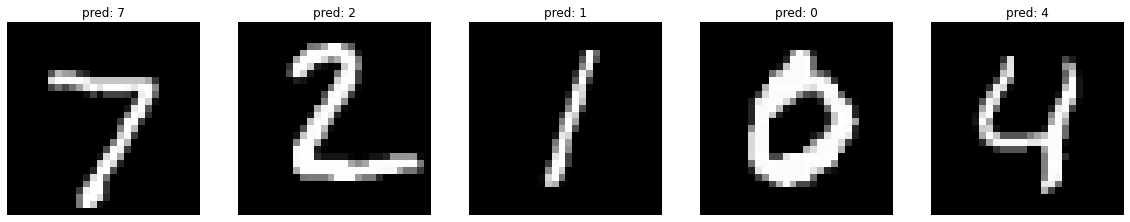

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# set up matplotlib fig, and size it to fit 3x4 pics
nrows = 1
ncols = 5
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# predict images from validation set
n_images = 5
test_images = x_test[:n_images]
predictions = model.predict(test_images)

# visualize image and model prediction
for i in range(n_images):
    # set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1, title="pred: %i" % np.argmax(predictions[i]))
    sp.axis('Off') # don't show axes (or gridlines)
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')

plt.show()

## Extend Model

In [13]:
# add softmax layer to output 
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 10)                101770    
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
print (model.predict(x_test[5].reshape(1, 28, 28)))

[[-5.787668    7.6985173   0.0106236   0.07952323 -1.7058733  -3.105657
  -2.6627827   2.1422124  -0.21101323 -2.1631794 ]]


In [15]:
print (probability_model.predict(x_test[5].reshape(1, 28, 28)))

[[1.3826093e-06 9.9466127e-01 4.5589553e-04 4.8841396e-04 8.1921971e-05
  2.0206071e-05 3.1464439e-05 3.8424006e-03 3.6526637e-04 5.1855517e-05]]


In [16]:
print (np.argmax(probability_model.predict(x_test[5].reshape(1, 28, 28))))

1


## Define Model - Keras Functional API (Advanced, Complex Models)

In [17]:
# use tf.keras Functional API to define simple Multi Layer Perceptron model
x_i = tf.keras.layers.Input(shape=(28, 28))                 # input 28 X 28 single channel image
x1  = tf.keras.layers.Flatten()(x_i)                        # flatten 28 X 28 input to 784 X 1
x2  = tf.keras.layers.Dense(units=128, activation='relu')(x1) # 128 perceptrons for first layer
x3  = tf.keras.layers.Dense(units=10)(x2)                   # 10 units represent output classes
x_o = tf.keras.layers.Softmax()(x3)                         # softmax function for class probabilities

model2 = tf.keras.Model(inputs=x_i, outputs=x_o)

In [18]:
# compile the model
model2.compile(
    optimizer=tf.keras.optimizers.SGD(lr=0.01),          # Stochastic Gradient Descent
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# print model summary
model2.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
softmax_1 (Softmax)          (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
# run training
model2.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0672 - accuracy: 0.4836
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8020 - accuracy: 0.7188
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7078 - accuracy: 0.8021
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6793 - accuracy: 0.8136
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6656 - accuracy: 0.8199
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6572 - accuracy: 0.8247
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6511 - accuracy: 0.8278
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6465 - accuracy: 0.8306
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6429 - accuracy: 0.8322
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.639

In [20]:
# show the accuracy on the testing set
loss, accuracy = model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 1.6205 - accuracy: 0.8474
